# Introduction
Currently, most educational texts are matched to readers using traditional readability methods or commercially available formulas. However, each has its issues. Tools like Flesch-Kincaid Grade Level are based on weak proxies of text decoding (i.e., characters or syllables per word) and syntactic complexity (i.e., number or words per sentence). As a result, they lack construct and theoretical validity. At the same time, commercially available formulas, such as Lexile, can be cost-prohibitive, lack suitable validation studies, and suffer from transparency issues when the formula's features aren't publicly available.

https://arxiv.org/pdf/1907.11779.pdf

# Readability Metrics


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

https://pypi.org/project/py-readability-metrics/


Dale–Chall readability formula
https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula  
Score	Notes  
4.9 or lower	easily understood by an average 4th-grade student or lower  
5.0–5.9	easily understood by an average 5th or 6th-grade student  
6.0–6.9	easily understood by an average 7th or 8th-grade student  
7.0–7.9	easily understood by an average 9th or 10th-grade student  
8.0–8.9	easily understood by an average 11th or 12th-grade student  
9.0–9.9	easily understood by an average 13th to 15th-grade (college) student


In [3]:
import pandas as pd
df = pd.read_csv(r"https://raw.githubusercontent.com/jjschueder/SMUCaptsoneA/main/train.csv")

In [4]:
test_doc = df.iloc[0,3]
print(test_doc)

When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear snowshoes.


In [5]:
!pip install py-readability-metrics
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from readability import Readability
r = Readability(test_doc)
fk = r.flesch_kincaid()

In [7]:
# Other Metrics
# This doesn't generate output, look at example above
r.flesch_kincaid()
r.flesch()
r.gunning_fog()
r.coleman_liau()
r.dale_chall()
r.ari()
r.linsear_write()
#r.smog()
r.spache()

In [8]:
# apply Flesch-Kindcaid and Dale–Chall to dataframe
for index, row in df.iterrows():
    r = Readability(row['excerpt'])
    fk = r.flesch_kincaid()
    df.at[index, 'fkscore'] = fk.score
    df.at[index, 'fkgrade_level'] = fk.grade_level
    dc = r.dale_chall()
    df.at[index, 'dcscore'] = dc.score
    gf = r.gunning_fog()
    df.at[index, 'gfscore'] = gf.score
    cl = r.coleman_liau()
    df.at[index, 'clscore'] = cl.score
    ari = r.ari()
    df.at[index, 'ariscore'] = ari.score
    #df.at[index, 'dcgrade_level_low'] = dc.grade_levels[0]
    #df.at[index, 'dcgrade_level_high'] = dc.grade_levels[1]



In [9]:
df['words'] = [len(x.split()) for x in df['excerpt'].tolist()]

df['wordset'] = [len(set(x.split())) for x in df['excerpt'].tolist()] 
df['lexicaldiversity'] = df['words'] / df['wordset']
df.head(5)

,id,url_legal,license,excerpt,target,standard_error,fkscore,fkgrade_level,dcscore,gfscore,clscore,ariscore,words,wordset,lexicaldiversity
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,6.744474,7,6.560722,10.084510,8.298994,7.467202,179,114,1.570175
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,5.230699,5,7.606702,7.502951,5.229508,3.458525,169,127,1.330709
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,6.446818,6,8.108452,9.581818,6.137273,5.624091,166,128,1.296875
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,12.343512,12,6.996429,14.095610,8.968780,15.533171,164,118,1.389831
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,9.629619,10,1.995315,12.032109,5.153197,10.860408,147,51,2.882353


## Document Statistics
I want to count basic feautres to potentially add as features in our models

In [10]:
# I would use this to count sentences
import nltk
sents = nltk.sent_tokenize(test_doc)
print("Num Sents: ",len(sents))
sents

Num Sents:  11


['When the young people returned to the ballroom, it presented a decidedly changed appearance.',
 'Instead of an interior scene, it was a winter landscape.',
 'The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field.',
 'The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow.',
 'Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.',
 'At each end of the room, on the wall, hung a beautiful bear-skin rug.',
 'These rugs were for prizes, one for the girls and one for the boys.',
 'And this was the game.',
 'The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole.',
 'Each player was given a small flag which they were to plant on reaching the Pole.',
 'This would have been an easy matter, but each travel

In [11]:
# Count Words and calc words per sentence
words = 0
for sent in sents:
  get_words = sent.split(" ")
  num_words = len(get_words)
  words += num_words

print("Words in doc: ", words)
print("Words per Sent: ", words/len(sents))

Words in doc:  179
Words per Sent:  16.272727272727273


# Discovery

In [12]:
df.head()

,id,url_legal,license,excerpt,target,standard_error,fkscore,fkgrade_level,dcscore,gfscore,clscore,ariscore,words,wordset,lexicaldiversity
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,6.744474,7,6.560722,10.084510,8.298994,7.467202,179,114,1.570175
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,5.230699,5,7.606702,7.502951,5.229508,3.458525,169,127,1.330709
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,6.446818,6,8.108452,9.581818,6.137273,5.624091,166,128,1.296875
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,12.343512,12,6.996429,14.095610,8.968780,15.533171,164,118,1.389831
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,9.629619,10,1.995315,12.032109,5.153197,10.860408,147,51,2.882353


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2834 non-null   object 
 1   url_legal         830 non-null    object 
 2   license           830 non-null    object 
 3   excerpt           2834 non-null   object 
 4   target            2834 non-null   float64
 5   standard_error    2834 non-null   float64
 6   fkscore           2834 non-null   float64
 7   fkgrade_level     2834 non-null   object 
 8   dcscore           2834 non-null   float64
 9   gfscore           2834 non-null   float64
 10  clscore           2834 non-null   float64
 11  ariscore          2834 non-null   float64
 12  words             2834 non-null   int64  
 13  wordset           2834 non-null   int64  
 14  lexicaldiversity  2834 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 332.2+ KB


In [14]:
df.columns.values

array(['id', 'url_legal', 'license', 'excerpt', 'target',
       'standard_error', 'fkscore', 'fkgrade_level', 'dcscore', 'gfscore',
       'clscore', 'ariscore', 'words', 'wordset', 'lexicaldiversity'],
      dtype=object)

In [15]:
df.dtypes

id                   object
url_legal            object
license              object
excerpt              object
target              float64
standard_error      float64
fkscore             float64
fkgrade_level        object
dcscore             float64
gfscore             float64
clscore             float64
ariscore            float64
words                 int64
wordset               int64
lexicaldiversity    float64
dtype: object

In [16]:
# will get summary of continuous or the nominals
dfstats = df.describe()
dfstats

,target,standard_error,fkscore,dcscore,gfscore,clscore,ariscore,words,wordset,lexicaldiversity
count,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000,2834.000000
mean,-0.959319,0.491435,9.917098,7.869464,12.509284,8.537462,10.402972,172.982004,114.690191,1.516672
std,1.033579,0.034818,4.376662,1.659349,4.787521,2.998040,5.548807,16.974390,12.964558,0.144166
min,-3.676268,0.000000,-0.274790,0.267840,2.160000,-2.378896,-3.695789,135.000000,41.000000,1.225806
25%,-1.690320,0.468543,7.044826,6.841195,9.264832,6.591707,6.839115,159.000000,106.000000,1.430685
50%,-0.912190,0.484721,9.719968,7.735808,12.241037,8.543974,10.224044,175.000000,115.000000,1.498092
75%,-0.202540,0.506268,12.357926,8.819964,15.238172,10.408252,13.393405,188.000000,124.000000,1.575221
max,1.711390,0.649671,41.327363,13.961639,45.772139,23.149419,50.823433,205.000000,155.000000,4.243902


In [17]:
df.sum(numeric_only = True)

target               -2718.709394
standard_error        1392.727048
fkscore              28105.056234
dcscore              22302.059900
gfscore              35451.311390
clscore              24195.166716
ariscore             29482.022151
words               490231.000000
wordset             325032.000000
lexicaldiversity      4298.247918
dtype: float64

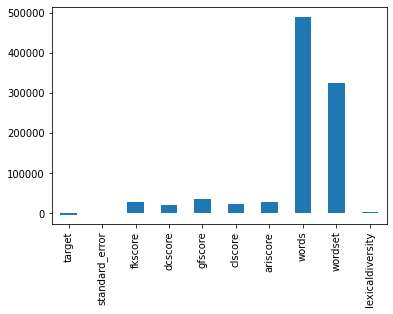

In [18]:
df.sum(numeric_only = True).plot.bar()

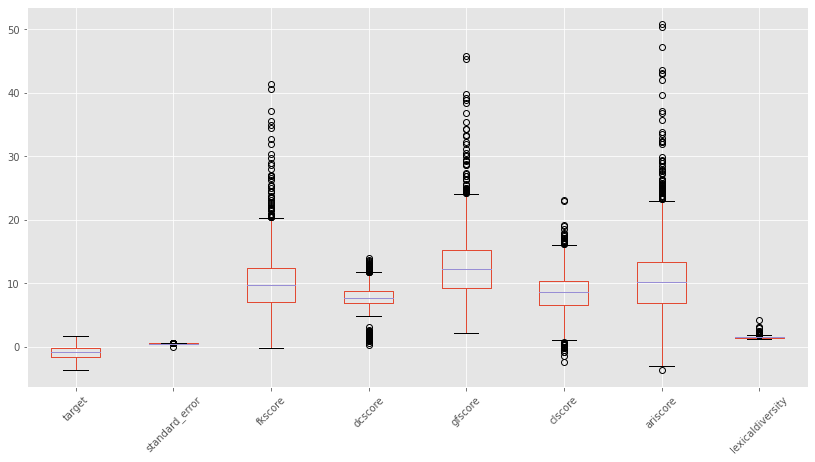

In [19]:
# display boxplot of sale_dollars grouped by liquor_category
plt.style.use('ggplot')
ax = df.boxplot(column = ['target', 'standard_error', 'fkscore', 'dcscore','gfscore',
       'clscore', 'ariscore', 'lexicaldiversity'], figsize=(14,7))
plt.xticks(rotation=45)
ax

In [20]:
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,id,url_legal,license,excerpt,target,standard_error,fkscore,fkgrade_level,dcscore,gfscore,clscore,ariscore,words,wordset,lexicaldiversity


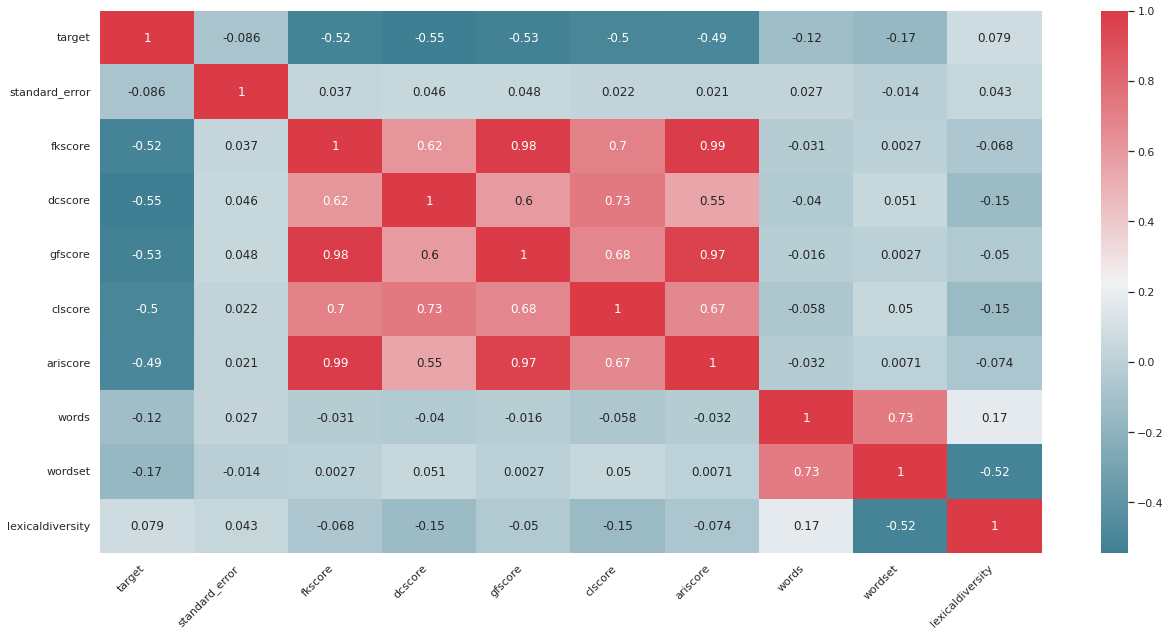

In [21]:
# plot the correlation matrix using seaborn
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# drop the counter attribute as that was used above when dealing with missing values
#del df['counter']

# show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(df.corr(), cmap=cmap, annot=True)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

# Model Building

## Bert Transformer Model

In [22]:
!pip install transformers
#https://www.kaggle.com/dagnelies/kiss-roberta

     |████████████████████████████████| 2.9 MB 12.7 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 895 kB 49.2 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 636 kB 49.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [23]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [24]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "


In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [26]:
def get_data(df):
    # These 2 lines took me days to figure out!!! 😖😖😖
    tokenized = tokenizer(df['excerpt'].tolist(), padding=True, return_tensors="np") # the "np" means it will return numpy arrays
    return {feat: tokenized[feat] for feat in tokenizer.model_input_names}
    
X = get_data(train)
X

{'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 'input_ids': array([[ 101, 1109, 1231, ...,    0,    0,    0],
        [ 101, 2397, 4697, ...,    0,    0,    0],
        [ 101, 1135, 3258, ...,    0,    0,    0],
        ...,
        [ 101, 1327,  170, ...,    0,    0,    0],
        [ 101, 1966, 1879, ...,    0,    0,    0],
        [ 101, 1109, 2226, ...,    0,    0,    0]]),
 'token_type_ids': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])}

In [27]:
X['attention_mask'].shape

(2267, 328)

In [28]:
y = train[["target"]].values # note that this is a list of single value lists
y

array([[-1.29256968],
       [-0.55614372],
       [-1.02187721],
       ...,
       [-1.96313605],
       [-1.48837258],
       [-0.71400876]])

https://towardsdatascience.com/how-to-combine-textual-and-numerical-features-for-machine-learning-in-python-dc1526ca94d9

In [29]:
import tensorflow as tf
numeric_input = tf.convert_to_tensor(df[['fkscore', 'fkgrade_level', 'dcscore', 'gfscore',
       'clscore', 'ariscore', 'words', 'wordset', 'lexicaldiversity']], dtype=tf.float32)

In [30]:
numeric_input

<tf.Tensor: shape=(2834, 9), dtype=float32, numpy=
array([[  6.7444744,   7.       ,   6.5607224, ..., 179.       ,
        114.       ,   1.5701754],
       [  5.2306995,   5.       ,   7.606702 , ..., 169.       ,
        127.       ,   1.3307086],
       [  6.4468184,   6.       ,   8.108452 , ..., 166.       ,
        128.       ,   1.296875 ],
       ...,
       [  4.000878 ,   4.       ,   6.4258647, ..., 190.       ,
        100.       ,   1.9      ],
       [  6.457544 ,   6.       ,   7.4850955, ..., 150.       ,
        104.       ,   1.4423077],
       [  6.8626237,   7.       ,   6.6810117, ..., 146.       ,
        100.       ,   1.46     ]], dtype=float32)>

In [31]:
import matplotlib.pyplot as plt

import keras
import tensorflow.keras.backend as K


early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=1,
    restore_best_weights=True,
)


# to define 'rmse' as loss instead of 'mse'
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 


def plot_hist(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    best_val_loss = min(history['val_loss'])
    print(f'Best validation loss: {best_val_loss:.3f}')

In [32]:
BASE_MODEL = 'bert-large-cased'

In [33]:
from tensorflow.keras.optimizers import Adam

In [34]:
from transformers import TFAutoModelForSequenceClassification
#from tensorflow.keras import optimizers

#tf.keras.optimizers.Adam(learning_rate=5e-5)

In [35]:
model = TFAutoModelForSequenceClassification.from_pretrained(BASE_MODEL, num_labels=1) # num_labels=1 results in a regression

model.compile(optimizer=Adam(learning_rate=1e-5), loss=rmse, metrics=[keras.metrics.RootMeanSquaredError()]) # small training rates are necessary!
model.summary()

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "


Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-large-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  333579264 
_________________________________________________________________
dropout_73 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1025      
Total params: 333,580,289
Trainable params: 333,580,289
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
907/907 - 1049s - loss: 0.6632 - root_mean_squared_error: 0.7564 - val_loss: 0.6055 - val_root_mean_squared_error: 0.6737
Epoch 2/5
907/907 - 992s - loss: 0.5086 - root_mean_squared_error: 0.5763 - val_loss: 0.6327 - val_root_mean_squared_error: 0.6967
Epoch 3/5
907/907 - 1006s - loss: 0.4166 - root_mean_squared_error: 0.4748 - val_loss: 0.4554 - val_root_mean_squared_error: 0.5192
Epoch 4/5
907/907 - 991s - loss: 0.3686 - root_mean_squared_error: 0.4199 - val_loss: 0.4542 - val_root_mean_squared_error: 0.5215
Epoch 5/5
907/907 - 995s - loss: 0.3425 - root_mean_squared_error: 0.3924 - val_loss: 0.5517 - val_root_mean_squared_error: 0.6142
Best validation loss: 0.454


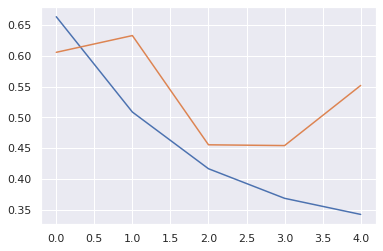

In [36]:
hist = model.fit(X, y, validation_split=0.2, epochs=5, batch_size=2, callbacks=[early_stop], verbose=2) # Mini-batches seem to overfit less

plot_hist(hist.history)

Take this model and merge it with other metrics like readability and sentence count etc. to train a new bert dense model.
* install py-readability-metrics
* Author for readability metrics package: https://www.linkedin.com/in/carmine/
* add a large amount of dropout
* large batch sizes
* gradient clipping

* Winning models will be sure to incorporate text cohesion and semantics.





In [37]:
print(hist.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


In [38]:
hist.history['val_root_mean_squared_error']

[0.6736653447151184,
 0.6966567039489746,
 0.5191614627838135,
 0.5214706659317017,
 0.614248514175415]

In [42]:
X_test = get_data(test)
y_test = model.predict(X_test)

In [43]:
y_test['logits']

array([[-6.32164598e-01],
       [-1.18582630e+00],
       [ 5.45555890e-01],
       [-1.30183363e+00],
       [-1.94119847e+00],
       [ 2.98473388e-02],
       [-1.13152958e-01],
       [-1.09126151e+00],
       [ 3.61493453e-02],
       [ 1.00162864e-01],
       [-1.48343289e+00],
       [-7.25022331e-02],
       [-2.62513256e+00],
       [-1.42053649e-01],
       [-1.90116191e+00],
       [-2.71405801e-02],
       [ 3.97172511e-01],
       [-2.06976843e+00],
       [-7.28727400e-01],
       [-9.74816084e-03],
       [ 5.11360288e-01],
       [-2.14378977e+00],
       [-1.19004428e+00],
       [ 2.52393842e-01],
       [-1.64878106e+00],
       [-1.33929360e+00],
       [ 5.22984028e-01],
       [-1.83232629e+00],
       [-1.87531936e+00],
       [-1.21446979e+00],
       [ 5.34920871e-01],
       [-8.89423430e-01],
       [-1.38308775e+00],
       [-2.28972840e+00],
       [-1.29247904e+00],
       [-7.68681228e-01],
       [ 5.35912752e-01],
       [-4.70349550e-01],
       [-1.9

In [44]:
len(y_test['logits'])

567

In [45]:
y

array([[-1.29256968],
       [-0.55614372],
       [-1.02187721],
       ...,
       [-1.96313605],
       [-1.48837258],
       [-0.71400876]])

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
y_test['logits']

array([[-6.32164598e-01],
       [-1.18582630e+00],
       [ 5.45555890e-01],
       [-1.30183363e+00],
       [-1.94119847e+00],
       [ 2.98473388e-02],
       [-1.13152958e-01],
       [-1.09126151e+00],
       [ 3.61493453e-02],
       [ 1.00162864e-01],
       [-1.48343289e+00],
       [-7.25022331e-02],
       [-2.62513256e+00],
       [-1.42053649e-01],
       [-1.90116191e+00],
       [-2.71405801e-02],
       [ 3.97172511e-01],
       [-2.06976843e+00],
       [-7.28727400e-01],
       [-9.74816084e-03],
       [ 5.11360288e-01],
       [-2.14378977e+00],
       [-1.19004428e+00],
       [ 2.52393842e-01],
       [-1.64878106e+00],
       [-1.33929360e+00],
       [ 5.22984028e-01],
       [-1.83232629e+00],
       [-1.87531936e+00],
       [-1.21446979e+00],
       [ 5.34920871e-01],
       [-8.89423430e-01],
       [-1.38308775e+00],
       [-2.28972840e+00],
       [-1.29247904e+00],
       [-7.68681228e-01],
       [ 5.35912752e-01],
       [-4.70349550e-01],
       [-1.9

In [48]:
dfpreds = pd.DataFrame(y_test['logits'], columns=['bertpred'])
dfpreds

,bertpred
0,-0.632165
1,-1.185826
2,0.545556
3,-1.301834
4,-1.941198
...,...
562,-1.933423
563,-0.948793
564,-0.909236
565,-0.905563


In [49]:
#rmse of average of bert and rf
from math import sqrt
sqrt(mean_squared_error(test['target'], y_test['logits']))

0.6021140215700418

## Simple numeric model using sklearn on traditional scoring metrics

In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
X = df[['fkscore', 'dcscore', 'gfscore',
       'clscore', 'ariscore', 'lexicaldiversity']].copy()
y = df.target


# We split the data but use the stratify option to ensure a 
# balanced split of the outcome "y" across the test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

NameError: ignored

In [51]:
#setup scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [52]:
import sklearn.metrics as metrics
#sorted(metrics.SCORERS.keys())

In [53]:
# Establish the default parameters for the models to be used below
rand_state = 101
n_iterations = 5

# Establish the cross validation parameters to be used in the models
cv = KFold(n_splits=n_iterations, random_state=rand_state)

#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestRegressor

linreg = RandomForestRegressor()
parameters = { 'min_samples_split':[2,3,4,5]
              ,'n_estimators' : [500]
              ,'min_samples_leaf': [10, 25, 50]
              ,'criterion': ['mae']
              ,'n_jobs':[8] 
              ,'random_state': [0]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , n_jobs=8 
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring= 'neg_mean_squared_error')


#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(scaler.fit_transform(X_train), y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 15.0min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed: 22.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_..., n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, war

In [54]:
regGridSearch.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=8, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=8, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)



In [55]:
regGridSearch.cv_results_

{'mean_fit_time': array([127.9394475 , 201.00618896, 200.96793985, 203.60752792,
        182.47479987, 180.53759241, 180.17097511, 177.06425557,
        161.31796498, 158.50511789, 151.61322727, 137.11278186]),
 'mean_score_time': array([0.38113532, 1.05814695, 0.87951851, 0.89145436, 0.96266804,
        0.97521009, 0.82501836, 1.0554882 , 1.06902771, 1.12173519,
        0.91288581, 0.38038373]),
 'mean_test_score': array([-0.62966163, -0.62966163, -0.62966163, -0.62966163, -0.6317908 ,
        -0.6317908 , -0.6317908 , -0.6317908 , -0.63726468, -0.63726468,
        -0.63726468, -0.63726468]),
 'param_criterion': masked_array(data=['mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae', 'mae',
                    'mae', 'mae', 'mae', 'mae'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10, 10, 10, 10, 25, 25, 25, 25, 

In [56]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae', max_depth=None, 
                      max_features='auto', max_leaf_nodes=None, max_samples=None, 
                      min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=10, 
                      min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8, oob_score=False, 
                      random_state=0, verbose=0, warm_start=False)

In [57]:
rf.fit(scaler.fit_transform(X_train), y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=8, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit
from sklearn import metrics as mt
import numpy as np

At this point we could do ensemble methods for combining the two models...
https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor


#Produce Predictions

In [59]:
yhat = rf.predict(scaler.fit_transform(X_test))
yhat

array([-7.69557815e-01, -1.86565863e+00, -7.66828984e-01,  2.16992098e-01,
       -1.71114720e+00, -2.62105245e-01, -1.91112889e+00, -7.61281446e-01,
       -1.32589851e-01, -1.84709582e+00, -1.59223217e+00, -1.46756099e+00,
       -3.08627724e-01,  3.67444397e-01, -2.16280984e+00, -1.06942604e+00,
       -1.74828668e+00, -9.24682642e-01, -3.44783102e-01, -1.56615152e+00,
       -1.50841258e+00, -1.15883715e+00, -2.05662490e+00, -7.33348833e-01,
       -1.10801251e+00, -5.14058057e-01, -5.71860086e-01, -3.15391164e-02,
       -1.81995064e+00, -1.13783959e+00, -6.59168621e-01, -1.15417122e+00,
       -1.51257561e+00, -1.69907795e+00, -3.65371820e-01,  3.13126093e-01,
       -4.17638740e-01, -9.52144586e-01, -1.20343638e+00, -7.46627429e-01,
       -1.58490175e+00, -1.02589503e+00, -9.42868079e-01, -8.36331791e-01,
       -6.45422287e-02, -5.16772284e-02, -1.29087931e+00, -1.97222531e-01,
       -1.46526787e+00, -1.52148451e+00, -2.16603754e+00, -7.89543922e-01,
       -1.99155957e+00, -

In [60]:
mean_squared_error(y_test, yhat)

0.6254455254946713